Load the Data in Python

In [4]:
import pandas as pd

# Load dataset
df = pd.read_csv("rideshare_kaggle.csv")

# Display first few rows
print(df.head())

# Check dataset info
print(df.info())


                                     id     timestamp  hour  day  month  \
0  424553bb-7174-41ea-aeb4-fe06d4f4b9d7  1.544953e+09     9   16     12   
1  4bd23055-6827-41c6-b23b-3c491f24e74d  1.543284e+09     2   27     11   
2  981a3613-77af-4620-a42a-0c0866077d1e  1.543367e+09     1   28     11   
3  c2d88af2-d278-4bfd-a8d0-29ca77cc5512  1.543554e+09     4   30     11   
4  e0126e1f-8ca9-4f2e-82b3-50505a09db9a  1.543463e+09     3   29     11   

              datetime          timezone            source    destination  \
0  2018-12-16 09:30:07  America/New_York  Haymarket Square  North Station   
1  2018-11-27 02:00:23  America/New_York  Haymarket Square  North Station   
2  2018-11-28 01:00:22  America/New_York  Haymarket Square  North Station   
3  2018-11-30 04:53:02  America/New_York  Haymarket Square  North Station   
4  2018-11-29 03:49:20  America/New_York  Haymarket Square  North Station   

  cab_type  ... precipIntensityMax uvIndexTime  temperatureMin  \
0     Lyft  ...     

Clean and Prepare the Data

In [5]:
# Convert datetime column
df['datetime'] = pd.to_datetime(df['datetime'])

# Remove missing values
df = df.dropna()

# Remove duplicates
df = df.drop_duplicates()

# Convert categorical data to lowercase for consistency
df['cab_type'] = df['cab_type'].str.lower()
df['name'] = df['name'].str.lower()
df['source'] = df['source'].str.lower()
df['destination'] = df['destination'].str.lower()

# Display summary
print(df.info())


<class 'pandas.core.frame.DataFrame'>
Index: 637976 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   id                           637976 non-null  object        
 1   timestamp                    637976 non-null  float64       
 2   hour                         637976 non-null  int64         
 3   day                          637976 non-null  int64         
 4   month                        637976 non-null  int64         
 5   datetime                     637976 non-null  datetime64[ns]
 6   timezone                     637976 non-null  object        
 7   source                       637976 non-null  object        
 8   destination                  637976 non-null  object        
 9   cab_type                     637976 non-null  object        
 10  product_id                   637976 non-null  object        
 11  name                         63

Load Data into SQL

Create an SQLite Database and Table

In [6]:
import sqlite3

# Create a SQLite database
conn = sqlite3.connect("rideshare_database.db")

# Load data into SQL table
df.to_sql("rideshare_data", conn, if_exists="replace", index=False)

# Test query
query = "SELECT COUNT(*) FROM rideshare_data"
result = pd.read_sql(query, conn)
print(result)


   COUNT(*)
0    637976


SQL-Based Data Analysis

Number of Rides per Cab Type

In [7]:
query = """
SELECT cab_type, COUNT(*) AS total_rides
FROM rideshare_data
GROUP BY cab_type;
"""
cab_rides = pd.read_sql(query, conn)
print(cab_rides)


  cab_type  total_rides
0     lyft       307408
1     uber       330568


Average Fare by Ride Type

In [8]:
query = """
SELECT name, AVG(price) AS avg_fare
FROM rideshare_data
WHERE price IS NOT NULL
GROUP BY name
ORDER BY avg_fare DESC;
"""
avg_fares = pd.read_sql(query, conn)
print(avg_fares)


            name   avg_fare
0   lux black xl  32.324086
1      black suv  30.286763
2      lux black  23.062468
3          black  20.523786
4            lux  17.771240
5         uberxl  15.678144
6        lyft xl  15.309363
7          uberx   9.765074
8            wav   9.765019
9           lyft   9.610885
10      uberpool   8.752500
11        shared   6.029893


Visualizing Data with Matplotlib & Seaborn

C:\Users\Acer\AppData\Local\Temp\ipykernel_15416\1726212006.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='cab_type', data=df, palette="coolwarm")


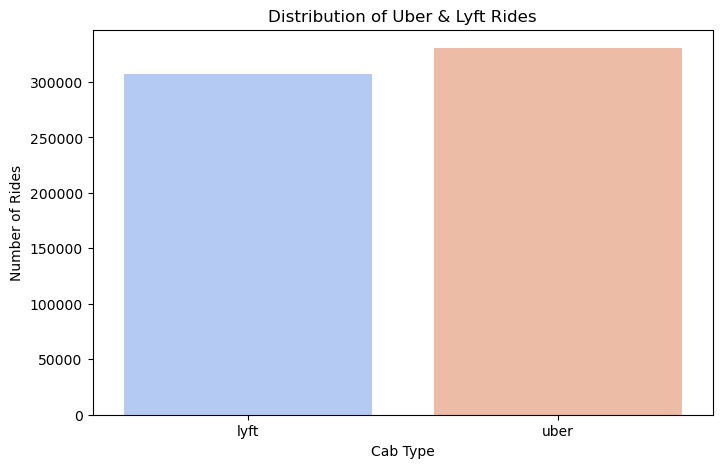

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot cab type distribution
plt.figure(figsize=(8,5))
sns.countplot(x='cab_type', data=df, palette="coolwarm")
plt.xlabel("Cab Type")
plt.ylabel("Number of Rides")
plt.title("Distribution of Uber & Lyft Rides")
plt.show()


Price Distribution (Boxplot)

C:\Users\Acer\AppData\Local\Temp\ipykernel_15416\1985208209.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cab_type', y='price', data=df, palette="coolwarm")


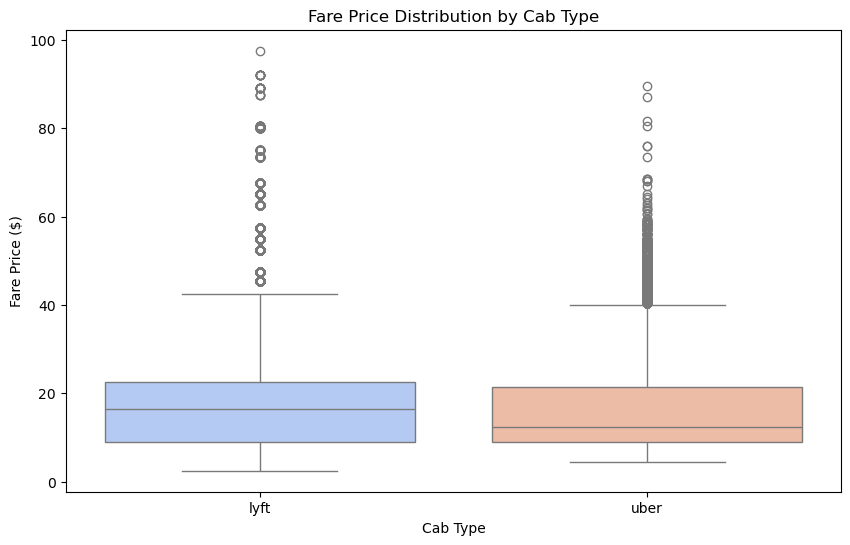

In [10]:
plt.figure(figsize=(10,6))
sns.boxplot(x='cab_type', y='price', data=df, palette="coolwarm")
plt.xlabel("Cab Type")
plt.ylabel("Fare Price ($)")
plt.title("Fare Price Distribution by Cab Type")
plt.show()


Peak Demand Hours (Heatmap Analysis)


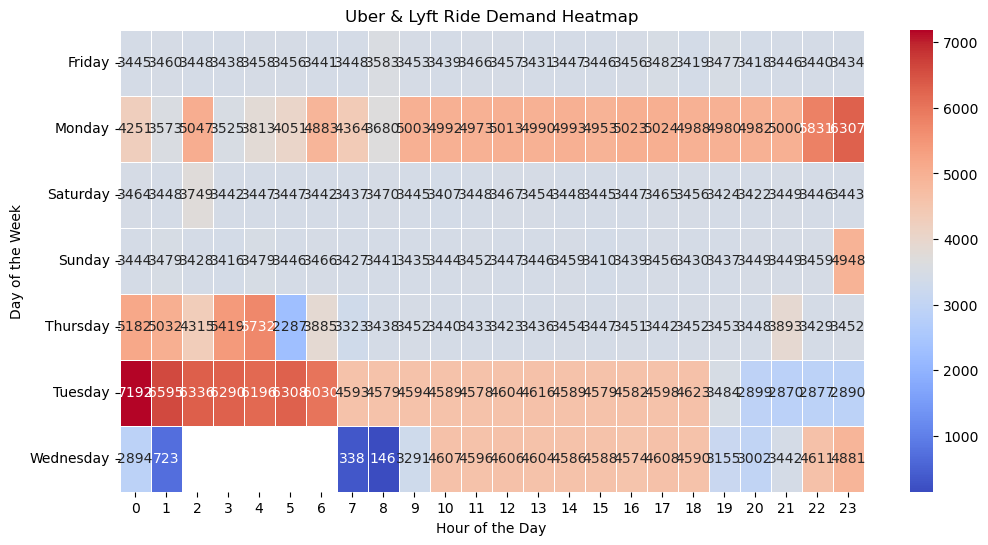

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Extract day and hour from datetime
# Extract day and hour from datetime
df['hour'] = df['datetime'].dt.hour
df['day_of_week'] = df['datetime'].dt.day_name()

# Create a pivot table for heatmap
heatmap_data = df.groupby(['day_of_week', 'hour']).size().unstack()

# Plot heatmap (Fix: Change fmt="d" to fmt=".0f")
plt.figure(figsize=(12,6))
sns.heatmap(heatmap_data, cmap="coolwarm", annot=True, fmt=".0f", linewidths=0.5)
plt.xlabel("Hour of the Day")
plt.ylabel("Day of the Week")
plt.title("Uber & Lyft Ride Demand Heatmap")
plt.show()


Surge Pricing Impact on Fares

C:\Users\Acer\AppData\Local\Temp\ipykernel_15416\4072403752.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='surge_status', y='price', data=df, palette="coolwarm")


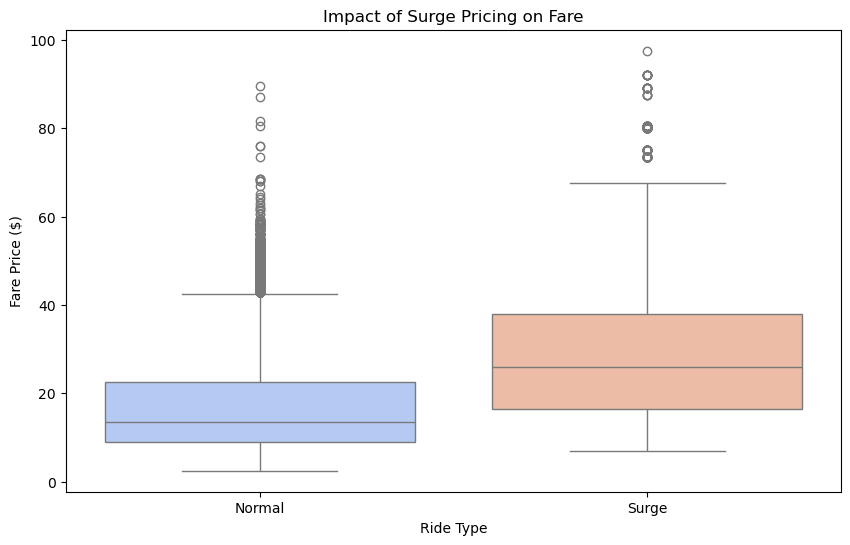

In [12]:
import numpy as np

# Create a new column to categorize rides into surge or non-surge
df['surge_status'] = np.where(df['surge_multiplier'] > 1, "Surge", "Normal")

# Boxplot to visualize the impact
plt.figure(figsize=(10,6))
sns.boxplot(x='surge_status', y='price', data=df, palette="coolwarm")
plt.xlabel("Ride Type")
plt.ylabel("Fare Price ($)")
plt.title("Impact of Surge Pricing on Fare")
plt.show()


Ride Duration Analysis

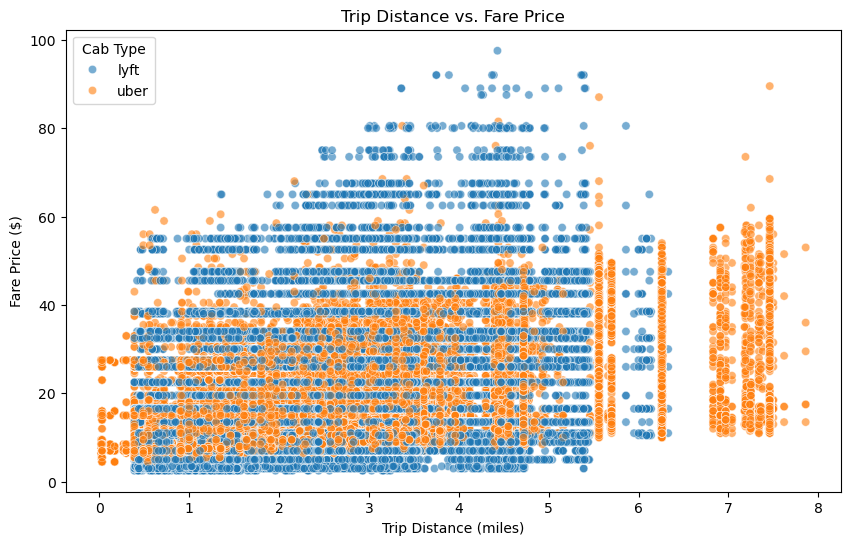

In [13]:
# Scatter plot of distance vs. fare price
plt.figure(figsize=(10,6))
sns.scatterplot(x='distance', y='price', hue='cab_type', data=df, alpha=0.6)
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Fare Price ($)")
plt.title("Trip Distance vs. Fare Price")
plt.legend(title="Cab Type")
plt.show()


Price Comparison: Uber vs. Lyft


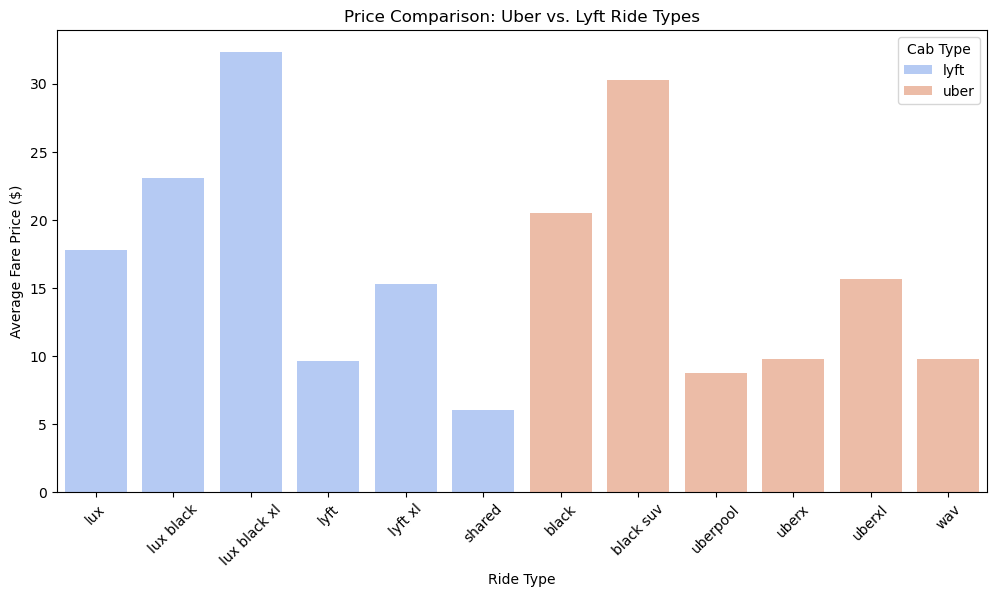

In [14]:
# Group data by cab type and ride type
price_comparison = df.groupby(['cab_type', 'name'])['price'].mean().reset_index()

# Plot price comparison
plt.figure(figsize=(12,6))
sns.barplot(x='name', y='price', hue='cab_type', data=price_comparison, palette="coolwarm")
plt.xlabel("Ride Type")
plt.ylabel("Average Fare Price ($)")
plt.title("Price Comparison: Uber vs. Lyft Ride Types")
plt.xticks(rotation=45)
plt.legend(title="Cab Type")
plt.show()


Model Accuracy: 0.55

Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.86      0.66     66257
           1       0.58      0.21      0.31     61339

    accuracy                           0.55    127596
   macro avg       0.56      0.54      0.49    127596
weighted avg       0.56      0.55      0.49    127596



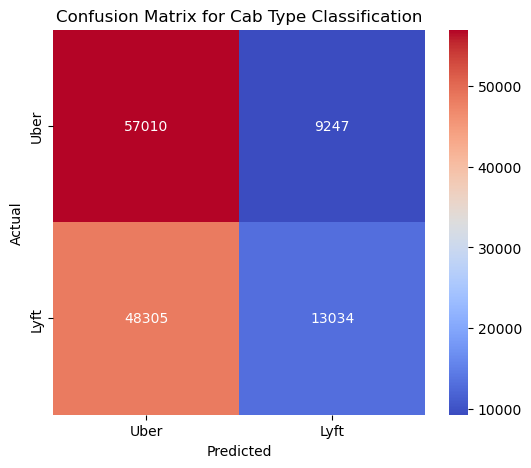

In [15]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Connect to SQLite database
conn = sqlite3.connect("rideshare_database.db")

# Load data
df = pd.read_sql("SELECT * FROM rideshare_data", conn)

# Selecting relevant features
features = ['price', 'distance', 'surge_multiplier']
df = df.dropna(subset=features)  # Remove rows with missing values

# Convert cab_type to binary (Uber=0, Lyft=1)
df['cab_type'] = df['cab_type'].map({'uber': 0, 'lyft': 1})

# Splitting data into features (X) and target variable (y)
X = df[features]
y = df['cab_type']

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features (Scaling for better performance)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix Visualization
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="coolwarm", xticklabels=["Uber", "Lyft"], yticklabels=["Uber", "Lyft"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Cab Type Classification")
plt.show()
